# TP3 sur la réduction de dimension

## Exercice 1 : Fichier mystere !

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("mystery.csv")
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5000 non-null   float64
 1   y       5000 non-null   float64
 2   z       5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


Index(['x', 'y', 'z'], dtype='object')

In [ ]:
df.describe(include='all')

,x,y,z
count,5000.000000,5000.000000,5000.000000
mean,-1.435869,13.987612,14.640661
std,5.206094,17.666334,9.329521
min,-11.222926,-29.753165,-8.943011
25%,-5.886956,-1.595890,8.535664
50%,-1.351116,16.628227,15.998955
75%,3.143237,27.312951,21.854507
max,8.485872,44.376445,30.373069


In [ ]:
df.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [ ]:
df.head()

,x,y,z
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


In [ ]:
df.shape

(5000, 3)

In [ ]:
#corrélation du dataframe
df.corr()

,x,y,z
x,1.000000,-0.502443,0.061252
y,-0.502443,1.000000,0.036521
z,0.061252,0.036521,1.000000


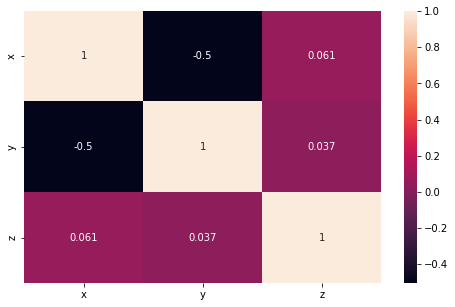

In [ ]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8,5))
sns.heatmap(corr_df, annot=True)
plt.show()

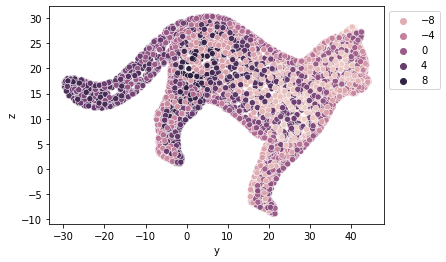

In [ ]:
scatterplot = sns.scatterplot(x='y', y='z', hue='x', data=df)
scatterplot.legend(bbox_to_anchor=(1,1))
plt.show()

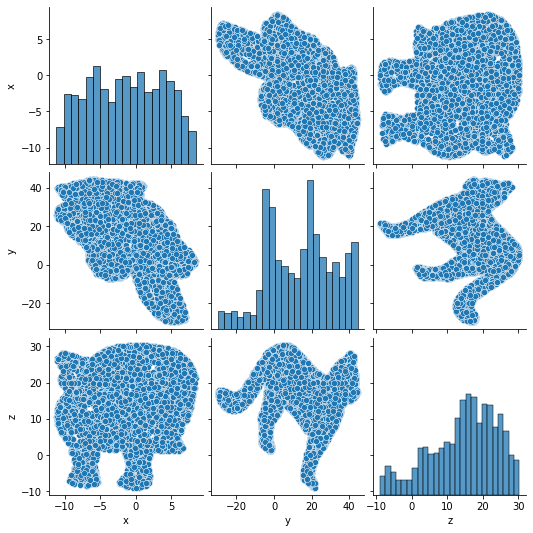

In [ ]:
#pairplot
sns.pairplot(df)

In [ ]:
#Centré réduit
df_scaled = df.copy()
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].mean()) / df_scaled[column].std(ddof=0)
# Vérification moyenne nulle (à quelques écart près)
print("Moyenne de la colonne x =", df_scaled["x"].mean())
print("Moyenne de la colonne y =", df_scaled["y"].mean())
print("Moyenne de la colonne z =", df_scaled["z"].mean())

# Ecart type

print("Ecart type de la colonne x =", df_scaled["x"].std(ddof=0))
print("Ecart type de la colonne y =", df_scaled["y"].std(ddof=0))
print("Ecart type de la colonne z =", df_scaled["z"].std(ddof=0))


df_scaled.head()

Moyenne de la colonne x = 3.1228353236656405e-16
Moyenne de la colonne y = 1.3601120230077868e-15
Moyenne de la colonne z = 3.282751848132648e-15
Ecart type de la colonne x = 0.9999999999999963
Ecart type de la colonne y = 0.9999999999999981
Ecart type de la colonne z = 1.0000000000000018


,x,y,z
0,-1.258864,0.093199,-2.183276
1,0.296654,-0.987500,0.818144
2,0.576558,-0.173897,1.543593
3,0.422807,1.236618,0.670130
4,-1.430174,0.396371,-0.675715


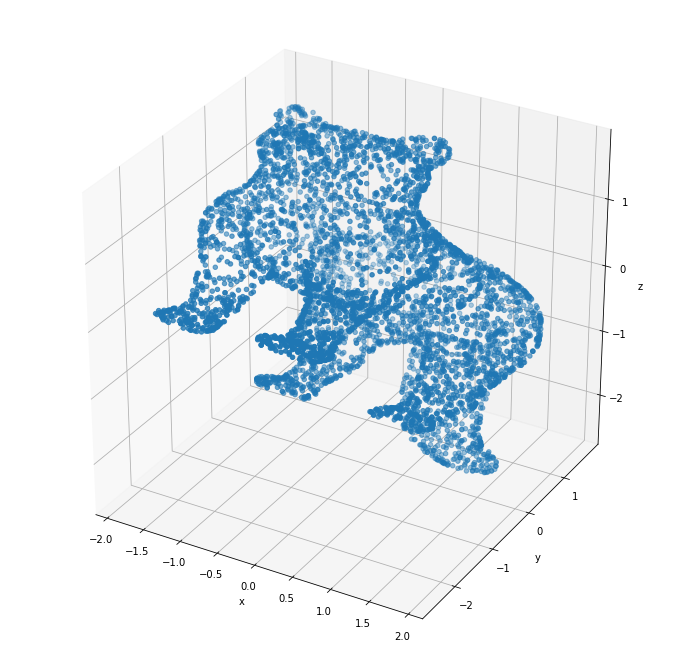

In [ ]:
fig = plt.figure(figsize=(12,12))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(df_scaled["x"], df_scaled["z"], df_scaled["y"])
axis.set_xlabel("x", fontsize=10)
axis.set_ylabel("y", fontsize=10)
axis.set_zlabel("z", fontsize=10)
plt.show()

In [ ]:
# Calcul des composantes principales (PCA)
pca = PCA()
X = pca.fit_transform(df_scaled)
X.shape

(5000, 3)

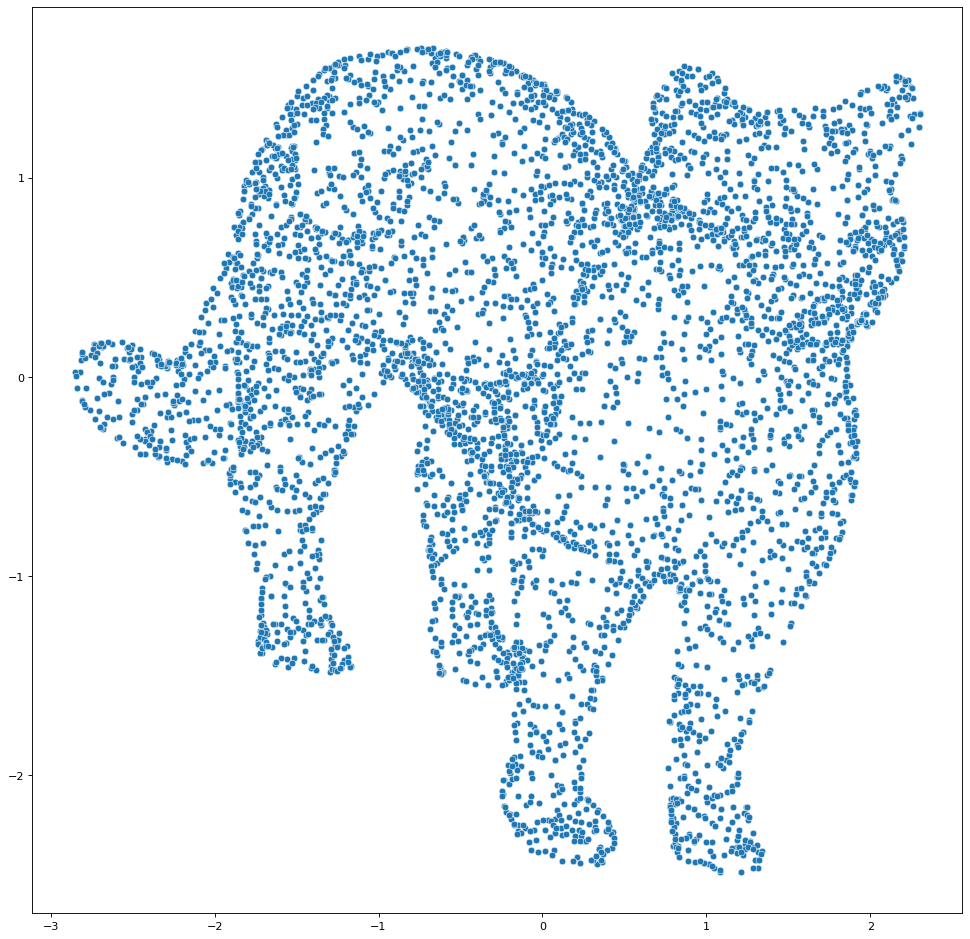

In [ ]:
plt.figure(figsize=(15, 15), dpi=80)
scatterplot = sns.scatterplot(x=-X[:,0], y=-X[:,1], data=df)
plt.show()

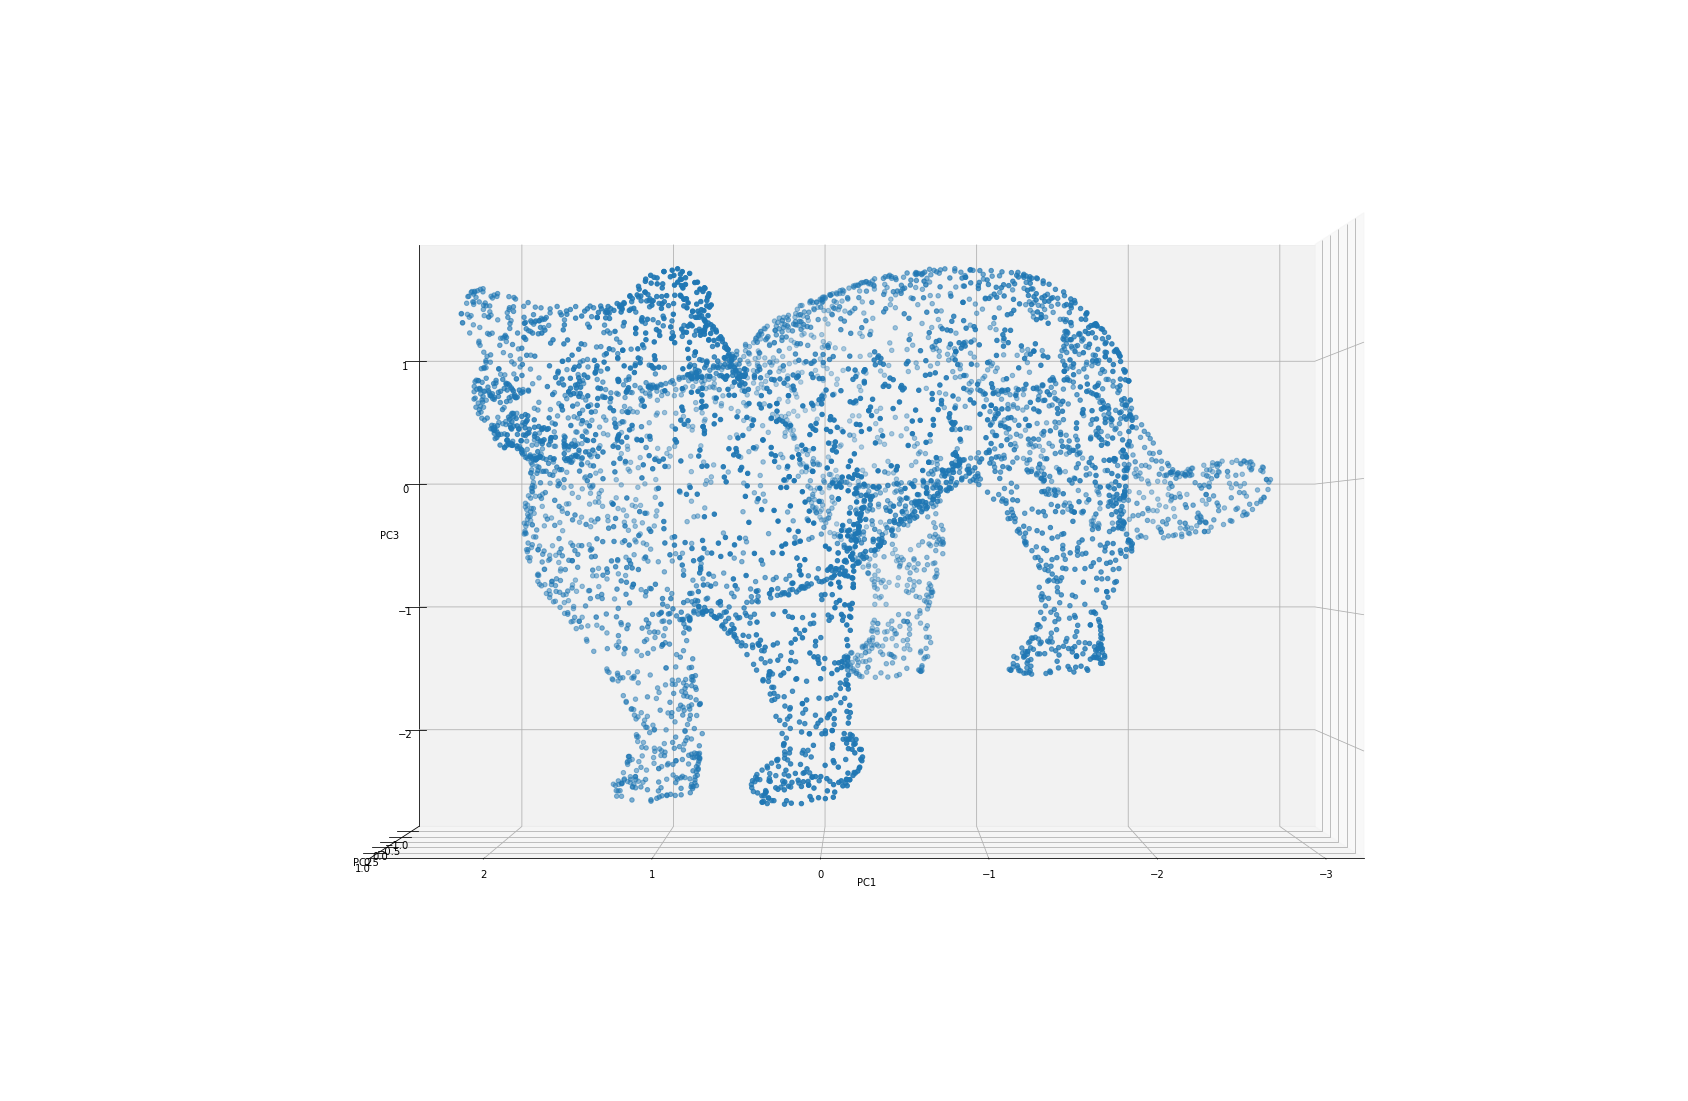

In [ ]:
fig = plt.figure(figsize=(30,20))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(-X[:,0],-X[:,2],-X[:,1])
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
axis.view_init(elev=0,azim=90)
plt.show()
#On a un chat ou une forme similaire

## Exercice 2 : Etude de feuilles 

![image](LeafReadMe.jpg)

In [ ]:
df_f = pd.read_csv("leaf.csv")
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1           339 non-null    int64  
 1   1.1         339 non-null    int64  
 2   0.72694     339 non-null    float64
 3   1.4742      339 non-null    float64
 4   0.32396     339 non-null    float64
 5   0.98535     339 non-null    float64
 6   1.2         339 non-null    float64
 7   0.83592     339 non-null    float64
 8   0.0046566   339 non-null    float64
 9   0.0039465   339 non-null    float64
 10  0.04779     339 non-null    float64
 11  0.12795     339 non-null    float64
 12  0.016108    339 non-null    float64
 13  0.0052323   339 non-null    float64
 14  0.00027477  339 non-null    float64
 15  1.1756      339 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 42.5 KB


In [ ]:
df_f.head()

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [ ]:
df_f.shape

(339, 16)

In [ ]:
sns.pairplot(df_f)

Error in callback <function flush_figures at 0x7fcfb4fe60e0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# ACP normée : centrer et réduire les données
df_f_scaled = df_f.copy()
# apply normalization techniques
for column in df_f_scaled.columns:
    df_f_scaled[column] = (df_f_scaled[column] - df_f_scaled[column].mean()) / df_f_scaled[column].std(ddof=0)

In [ ]:
pca = PCA()
X=pca.fit_transform(df_f_scaled)
X.shape 

(339, 16)

In [ ]:
df_X = pd.DataFrame({ 
    'Comp1': X[:,0],
    'Comp2': X[:,1],
    'Comp3': X[:,2],
    'Comp4': X[:,3],
    'Comp5': X[:,4],
    'Comp6': X[:,5],
    'Comp7': X[:,6],
    'Comp8': X[:,7],
},index=df_f_scaled['1.1756'])
df_X

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8
1.1756,,,,,,,,
-0.796784,-0.534585,-2.366778,-1.291850,-0.990164,1.452961,-0.069264,0.282634,0.085093
-1.229559,-1.363319,-2.758272,-1.426233,-0.763959,1.285679,0.080234,0.268982,-0.048117
-0.982711,-1.050312,-2.641088,-1.575918,-0.512573,1.177468,0.175686,0.279392,0.007324
-1.402833,-1.773585,-2.796075,-1.185496,-0.189804,1.237067,0.237017,0.140239,-0.157641
-1.405330,-1.292443,-2.898676,-1.753689,0.063066,1.013649,0.054612,0.280768,0.028636
...,...,...,...,...,...,...,...,...
1.479873,1.370159,5.834889,0.562252,-0.480749,-1.132713,-0.444764,-1.750816,0.012454
2.125847,2.959170,5.539969,0.643953,-0.459014,-1.751929,0.931620,-1.235349,0.310638
0.907763,1.033735,5.381181,0.327224,0.300507,-0.992867,-1.373064,-1.755546,0.315062


In [ ]:
l = np.corrcoef(x=X,y=df_f_scaled,rowvar=False)
print(l)

[[ 1.00000000e+00 -6.86597083e-17  4.25068167e-16 ...  7.57384470e-01
   7.30872731e-01  8.29882370e-01]
 [-6.86597083e-17  1.00000000e+00 -3.02494375e-16 ...  3.86175583e-01
   2.53813643e-01  3.74139865e-01]
 [ 4.25068167e-16 -3.02494375e-16  1.00000000e+00 ...  1.78071274e-01
   8.55739720e-02  1.00252450e-01]
 ...
 [ 7.57384470e-01  3.86175583e-01  1.78071274e-01 ...  1.00000000e+00
   4.09224185e-01  6.45003923e-01]
 [ 7.30872731e-01  2.53813643e-01  8.55739720e-02 ...  4.09224185e-01
   1.00000000e+00  7.97898100e-01]
 [ 8.29882370e-01  3.74139865e-01  1.00252450e-01 ...  6.45003923e-01
   7.97898100e-01  1.00000000e+00]]


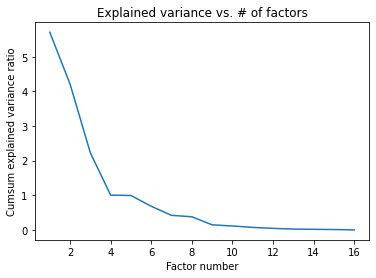

In [ ]:
# Choisir les composants a retenir
plt.plot(np.arange(1,pca.n_components_+1),pca.explained_variance_) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

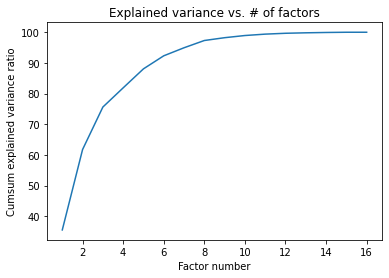

In [ ]:
#cumul de variance expliquée 
plt.plot(np.arange(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_*100)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

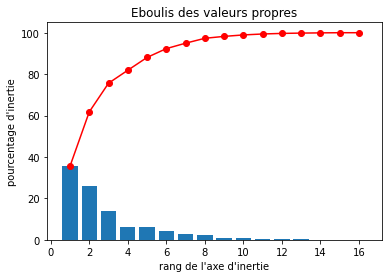

In [ ]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

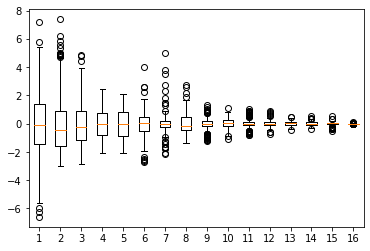

In [ ]:
plt.boxplot(X)
plt.show()

## Exercice 3 : Etude d'un fichier sur le cancer (pas drôle mais c'est des datas)

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
df.shape

(569, 30)

In [ ]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
# ACP normée : centrer et réduire les données
df_scaled = df.copy()
# apply normalization techniques
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].mean()) / df_scaled[column].std(ddof=0)

In [ ]:
pca = PCA()
X=pca.fit_transform(df_scaled)
X.shape 

(569, 30)

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df_X = pd.DataFrame({ 
    'Comp1': X[:,0],
    'Comp2': X[:,1],
    'Comp3': X[:,2],
    'Comp4': X[:,3],
    'Comp5': X[:,4],
    'Comp6': X[:,5],
    'Comp7': X[:,6],
    'Comp8': X[:,7],
    'Comp9': X[:,8],
    'Comp10': X[:,9],
    'Comp11': X[:,10],
    'Comp12': X[:,11],
    'Comp13': X[:,12],
    'Comp14': X[:,13],
},index=df_scaled['mean radius'])
df_X

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12,Comp13,Comp14
mean radius,,,,,,,,,,,,,,
1.097064,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804
1.829821,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475
1.579888,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680
-0.768909,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417
1.750297,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.110995,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290
1.704854,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,-0.192637,0.015555
0.702284,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691


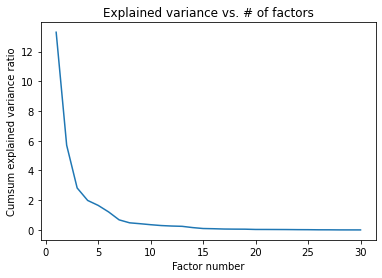

In [ ]:
# Choisir les composants a retenir
plt.plot(np.arange(1,pca.n_components_+1),pca.explained_variance_) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

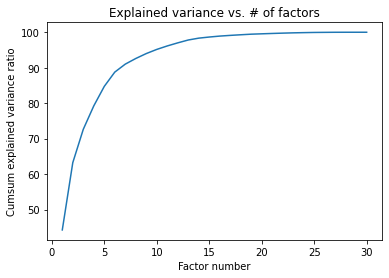

In [ ]:
#cumul de variance expliquée 
plt.plot(np.arange(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_*100)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

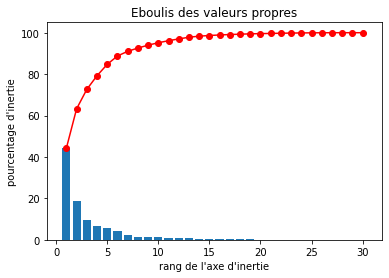

In [ ]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

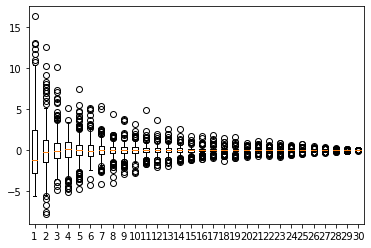

In [ ]:
plt.boxplot(X)
plt.show()